In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data_path = 'parts_wrangled.csv'
data = pd.read_csv(data_path)

In [3]:
# Step 1: Data Preprocessing
# Handle missing values (example: fill with mean or drop rows)
data = data.fillna(data.mean())

In [4]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('CLASS', axis=1))  # Exclude the target variable for PCA

In [5]:
# Step 2: PCA Calculation (Matrix-Based)
# Calculate covariance matrix
cov_matrix = np.cov(data_scaled, rowvar=False)

# Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]

# Explained variance
explained_variance = eigen_values / np.sum(eigen_values)
cumulative_variance = np.cumsum(explained_variance)

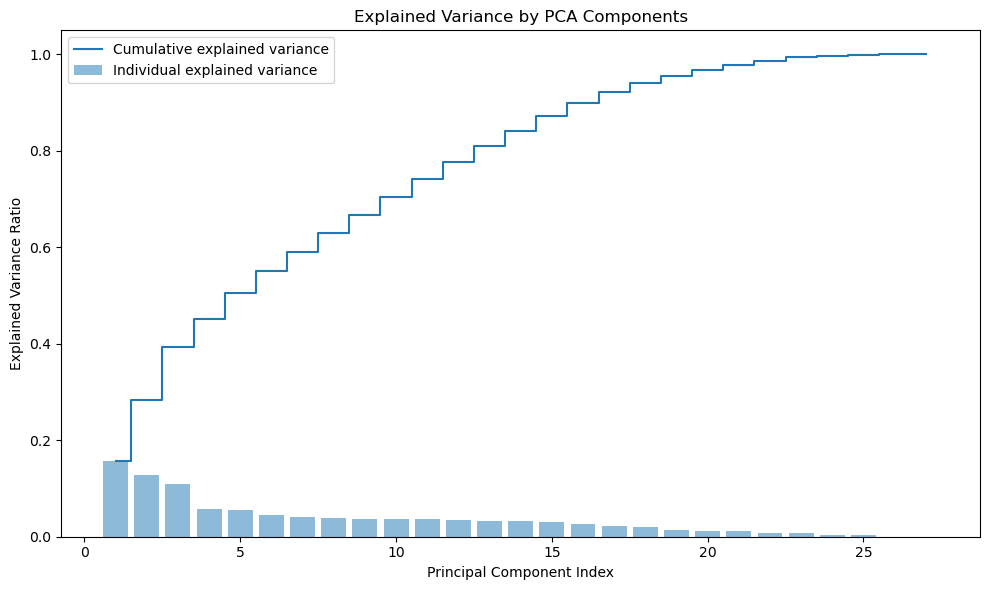

In [6]:
# Step 3: Visualization
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

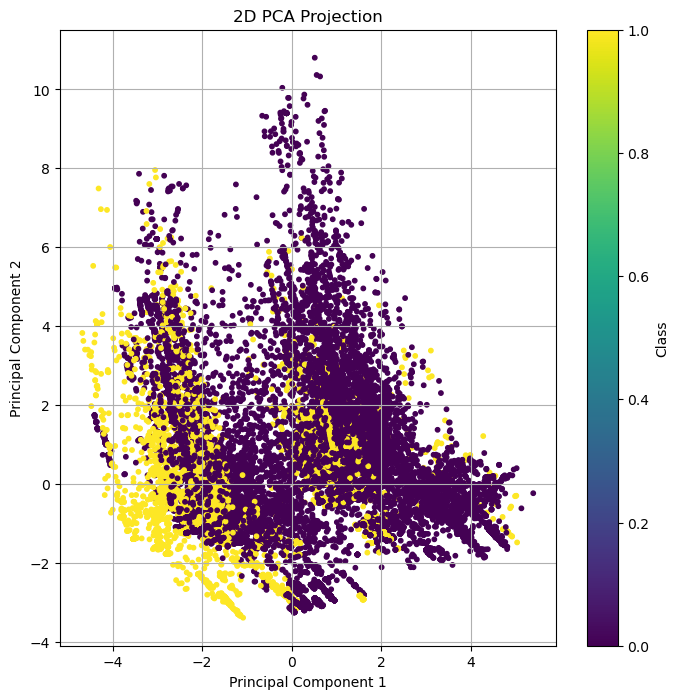

In [7]:
# Step 4: Project Data onto First Two Principal Components
projected_data = np.dot(data_scaled, eigen_vectors[:, :2])

# Scatter plot of the first two PCA components
plt.figure(figsize=(8, 8))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=data['CLASS'], cmap='viridis', s=10)
plt.colorbar(label='Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.grid()
plt.show()

In [8]:
# Step 5: Conclusion
# Summarize findings
print("PCA reduces dimensionality while retaining significant variance.")
print(f"The first two components explain {cumulative_variance[1]*100:.2f}% of the variance.")

PCA reduces dimensionality while retaining significant variance.
The first two components explain 28.41% of the variance.
